In [1]:
import pandas as pd
cleaned_hm_path = '/content/cleaned_hm.csv'
demographic_path = '/content/demographic.csv'

cleaned_hm_df = pd.read_csv(cleaned_hm_path)
demographic_df = pd.read_csv(demographic_path)

merged_df = pd.merge(cleaned_hm_df, demographic_df, on='wid')

print(merged_df.head())
print(merged_df.describe())
print(merged_df.shape)
print(merged_df.dtypes)

    hmid   wid reflection_period  \
0  27673  2053               24h   
1  27873  2053               24h   
2  28073  2053               24h   
3  33522  2053               24h   
4  34522  2053               24h   

                                         original_hm  \
0  I went on a successful date with someone I fel...   
1  I played a new game that was fun and got to en...   
2  I listened to some music and heard an entire a...   
3                 Went to see a movie with my friend   
4               Played guitar, learning a song on it   

                                          cleaned_hm  modified  num_sentence  \
0  I went on a successful date with someone I fel...      True             1   
1  I played a new game that was fun and got to en...      True             1   
2  I listened to some music and heard an entire a...      True             1   
3                 Went to see a movie with my friend      True             1   
4               Played guitar, learning a song

In [2]:
for column in ['country', 'gender', 'marital', 'parenthood']:
    print(merged_df[column].value_counts())

USA    79063
IND    16729
VEN      588
CAN      555
GBR      364
       ...  
CYP        3
ETH        3
KAZ        3
ISR        3
LVA        3
Name: country, Length: 100, dtype: int64
m    57690
f    42069
o      697
Name: gender, dtype: int64
single       54106
married      41343
divorced      3803
separated      649
widowed        477
Name: marital, dtype: int64
n    60937
y    39520
Name: parenthood, dtype: int64


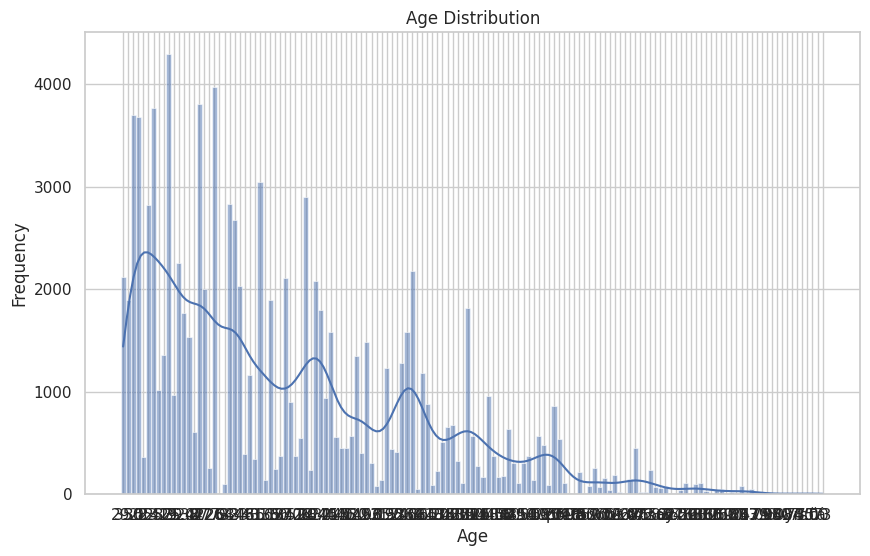

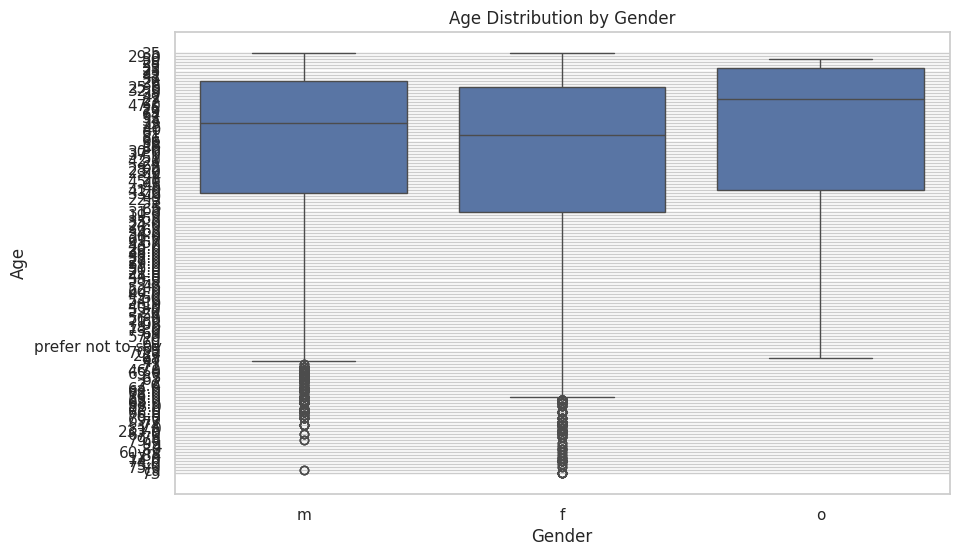

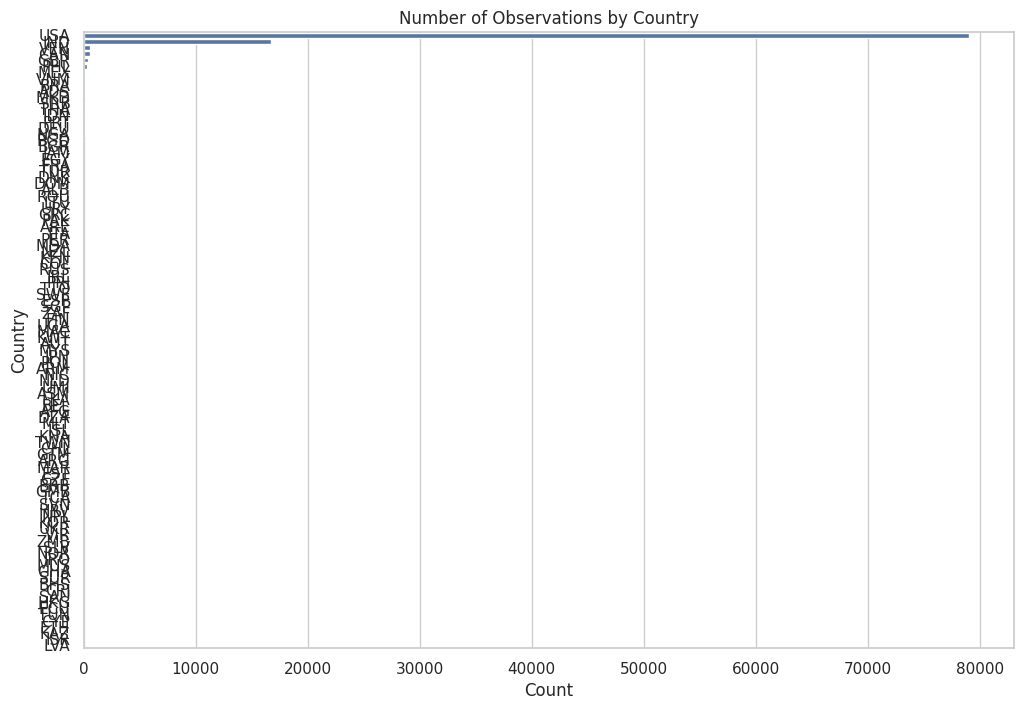

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(merged_df['age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=merged_df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(y='country', data=merged_df, order = merged_df['country'].value_counts().index)
plt.title('Number of Observations by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

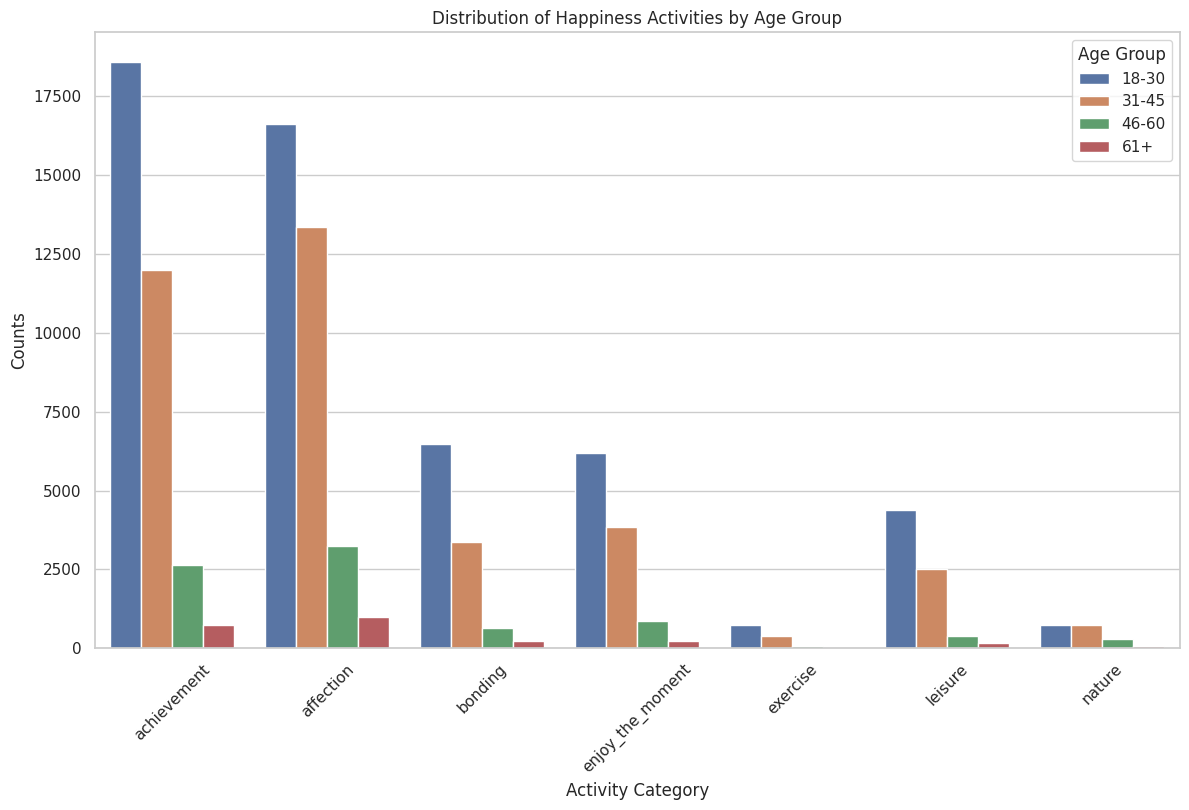

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 merged_df 是你的合并后的数据框

# 首先，确保 'age' 列是数值类型
merged_df['age'] = pd.to_numeric(merged_df['age'], errors='coerce')

# 定义年龄分组函数
def age_group(age):
    if age < 31:
        return '18-30'
    elif age < 46:
        return '31-45'
    elif age < 61:
        return '46-60'
    else:
        return '61+'

# 应用年龄分组
merged_df['age_group'] = merged_df['age'].apply(age_group)

# 计算不同年龄组在各类幸福感活动中的参与频率
activity_age_group_df = merged_df.groupby(['age_group', 'predicted_category']).size().reset_index(name='counts')

# 创建堆叠柱状图展示不同年龄组在各类幸福感活动的参与情况
plt.figure(figsize=(14, 8))
sns.barplot(x='predicted_category', y='counts', hue='age_group', data=activity_age_group_df)
plt.title('Distribution of Happiness Activities by Age Group')
plt.xlabel('Activity Category')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

In [5]:
entertainment_dict_path = '/content/entertainment-dict.csv'
entertainment_dict_df = pd.read_csv(entertainment_dict_path)

# Display the first few rows of the entertainment dictionary dataframe
entertainment_dict_df.head()

,movie
0,tv
1,film
2,television
3,show
4,book


In [16]:
import pandas as pd

# Load the cleaned_hm data
cleaned_hm_df = pd.read_csv('/content/cleaned_hm.csv')

# Load the entertainment dictionary
entertainment_dict_df = pd.read_csv('/content/entertainment-dict.csv')
# Assuming the column containing keywords is named 'movie', adjust if it's named differently
entertainment_keywords = entertainment_dict_df['movie'].tolist()

# Define a function to find and return matched entertainment keywords in the reflection
def find_entertainment_keywords(text):
    matched_keywords = [keyword for keyword in entertainment_keywords if keyword.lower() in text.lower()]
    return ', '.join(matched_keywords) if matched_keywords else 'No Entertainment Keyword'

# Apply the function to the 'cleaned_hm' column to create a new column for the matched keywords
cleaned_hm_df['entertainment_keywords'] = cleaned_hm_df['cleaned_hm'].apply(find_entertainment_keywords)

# Save the updated dataframe to a new CSV file
entertainment_keywords_matched_file_path = '/content/cleaned_hm_entertainment_keywords_matched.csv'
cleaned_hm_df.to_csv(entertainment_keywords_matched_file_path, index=False)

# Output the file path to confirm completion
entertainment_keywords_matched_file_path

'/content/cleaned_hm_entertainment_keywords_matched.csv'

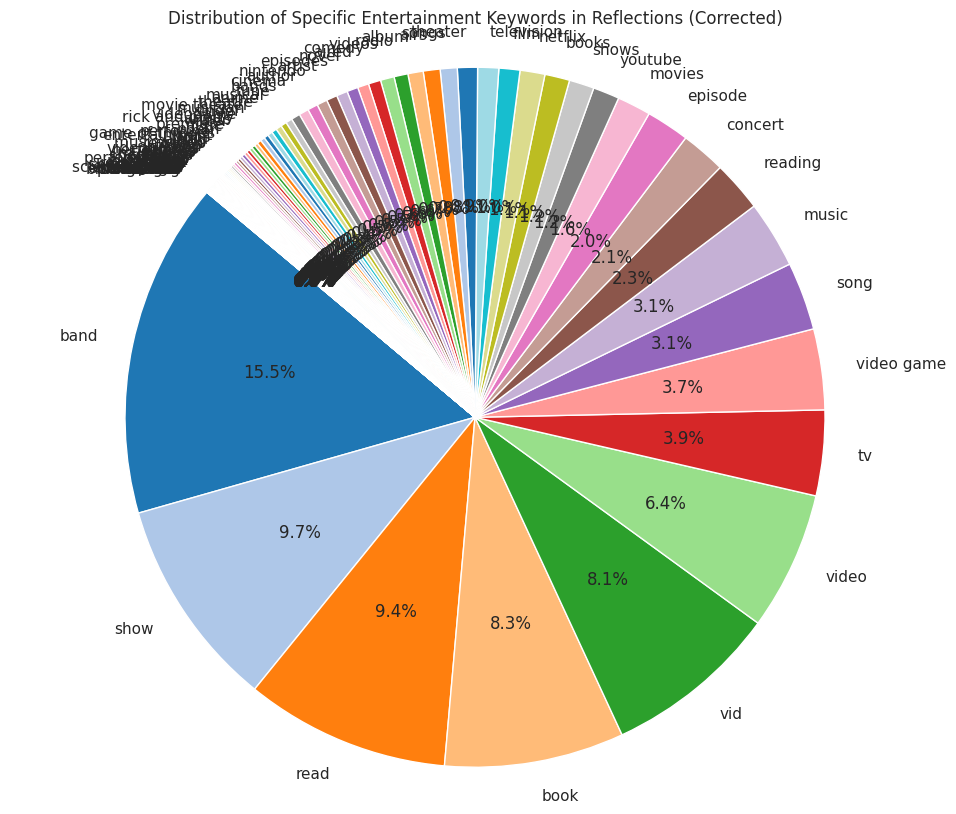

In [18]:
entertainment_keywords_matched_df_correct_path = pd.read_csv('/content/cleaned_hm_entertainment_keywords_matched.csv')

# Filter out rows where no entertainment keyword was found
entertainment_keywords_present_df_correct = entertainment_keywords_matched_df_correct_path[
    entertainment_keywords_matched_df_correct_path['entertainment_keywords'] != 'No Entertainment Keyword']

# Split and count specific entertainment keywords again
entertainment_keywords_split_df_correct = entertainment_keywords_present_df_correct['entertainment_keywords'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame('entertainment_keyword')
entertainment_keyword_counts_correct = entertainment_keywords_split_df_correct['entertainment_keyword'].value_counts()

# Plotting the pie chart with unique colors for each segment
plt.figure(figsize=(12, 10))
plt.pie(entertainment_keyword_counts_correct, labels=entertainment_keyword_counts_correct.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.axis('equal')  # Ensures the pie chart is drawn as a circle
plt.title('Distribution of Specific Entertainment Keywords in Reflections (Corrected)')
plt.show()


In [20]:
# after without the entertainment keywords under 1%

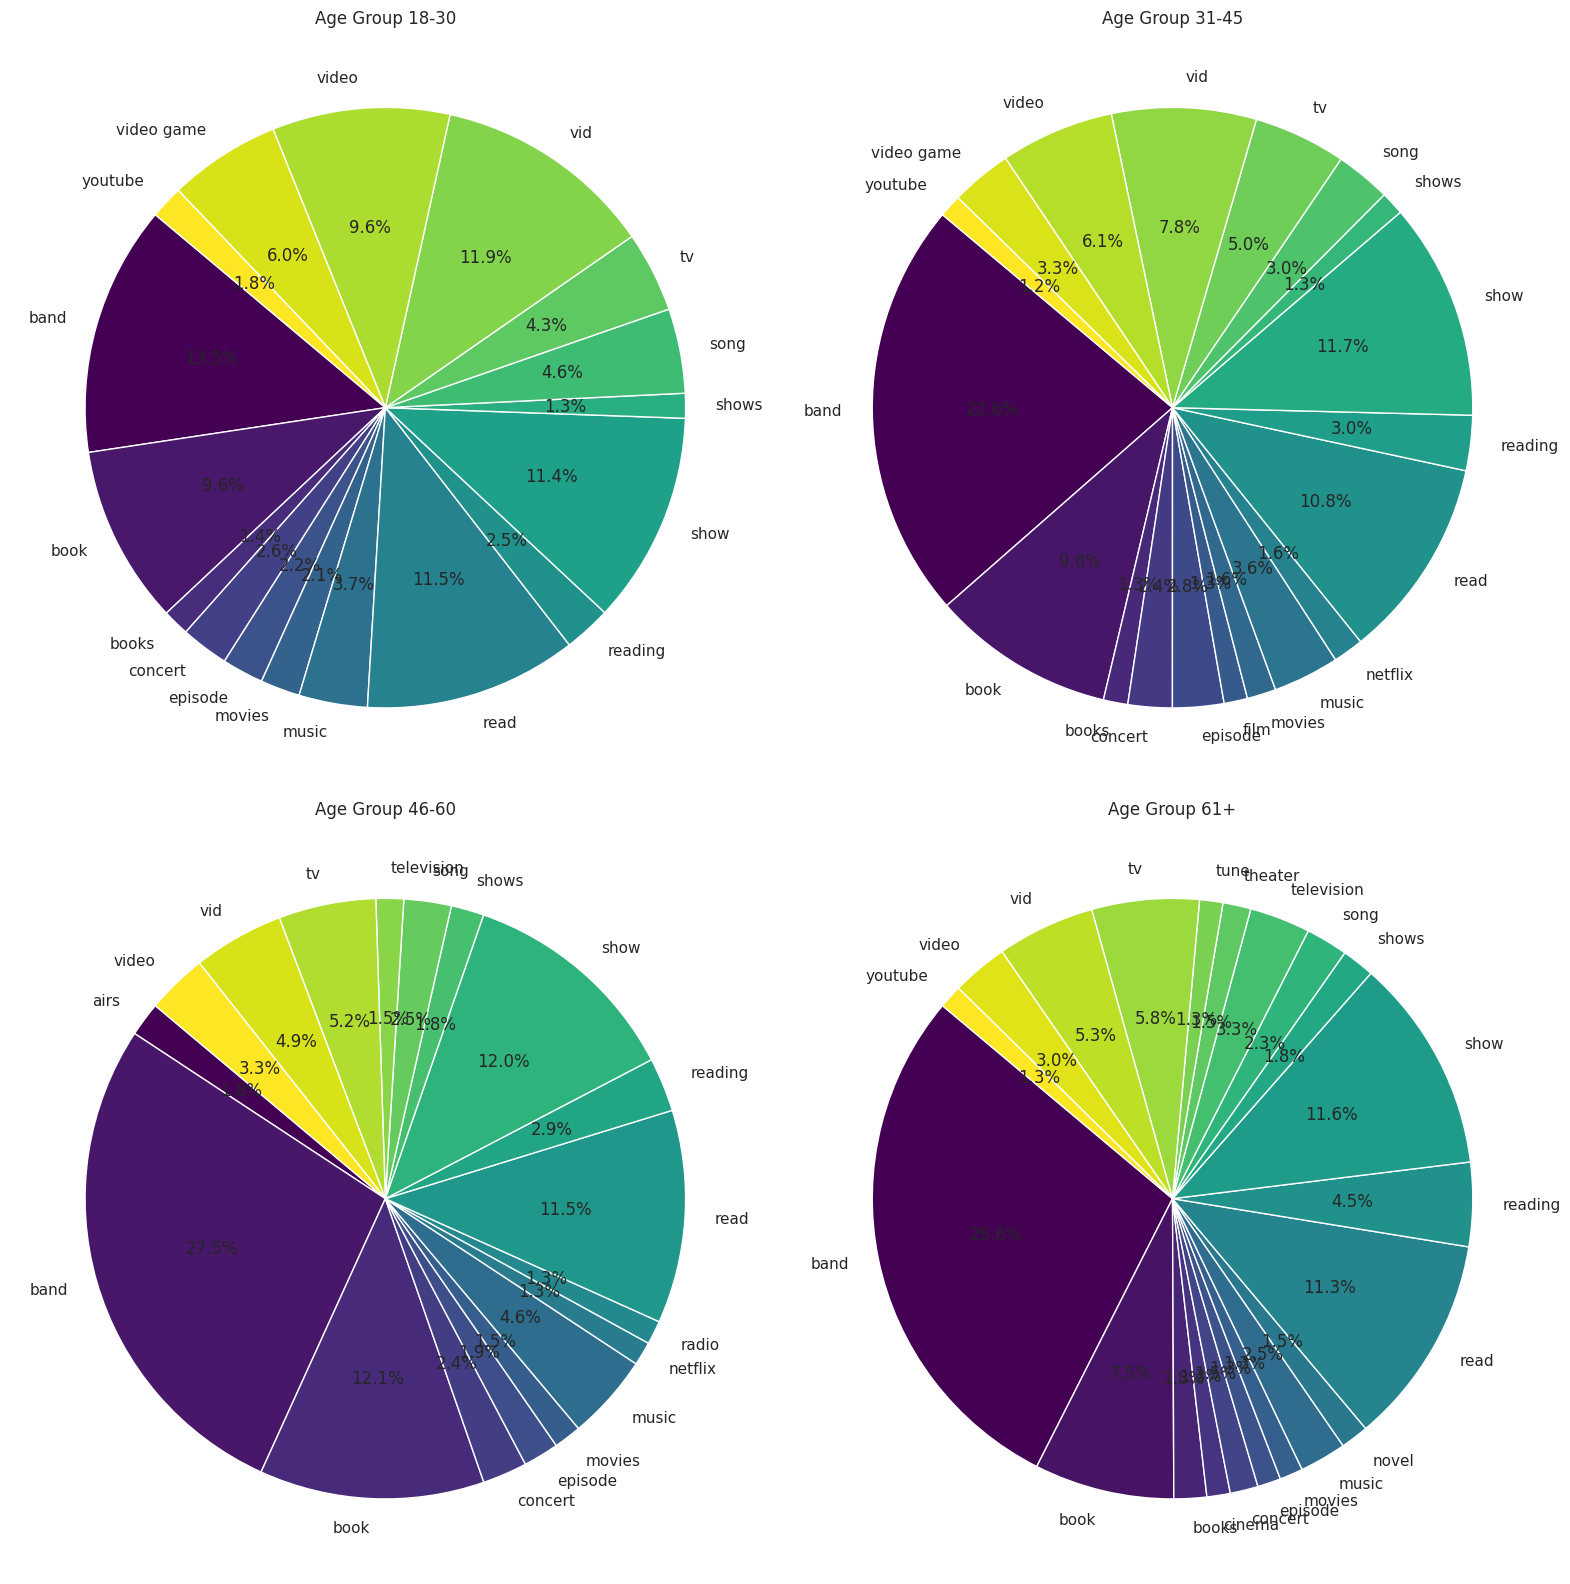

In [22]:
# Load the corrected data file that includes specific entertainment keywords matched
entertainment_keywords_matched_df = pd.read_csv('/content/cleaned_hm_entertainment_keywords_matched.csv', encoding='ISO-8859-1')

# Load demographic data to include age information
demographic_df = pd.read_csv('/content/demographic.csv', encoding='ISO-8859-1')

# Ensure 'age' column in demographic data is numeric
demographic_df['age'] = pd.to_numeric(demographic_df['age'], errors='coerce')

# Merge the entertainment keywords matched data with demographic information
entertainment_demographic_keywords_df = pd.merge(entertainment_keywords_matched_df, demographic_df[['wid', 'age']], on='wid', how='inner')

# Define age groups and categorize ages
bins_age_groups = [18, 30, 45, 60, 120]
labels_age_groups = ['18-30', '31-45', '46-60', '61+']
entertainment_demographic_keywords_df['age_group'] = pd.cut(entertainment_demographic_keywords_df['age'], bins=bins_age_groups, labels=labels_age_groups, include_lowest=True)

# Filter out entries without specific entertainment keywords
entertainment_keywords_filtered_df = entertainment_demographic_keywords_df[
    entertainment_demographic_keywords_df['entertainment_keywords'] != 'No Entertainment Keyword']

# Separate multiple keywords into different rows
entertainment_keywords_filtered_df = entertainment_keywords_filtered_df.assign(entertainment_keywords=entertainment_keywords_filtered_df['entertainment_keywords'].str.split(', ')).explode('entertainment_keywords')

# Group by age group and entertainment keyword, then count occurrences
keywords_age_group_count = entertainment_keywords_filtered_df.groupby(['age_group', 'entertainment_keywords']).size().reset_index(name='count')

# Pivot the data for pie chart visualization
pivot_keywords_age = keywords_age_group_count.pivot(index='entertainment_keywords', columns='age_group', values='count').fillna(0)

# Prepare and generate pie charts for each age group
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
for i, age_group in enumerate(labels_age_groups):
    ax = axs[i//2, i%2]
    data = pivot_keywords_age[age_group]
    total = data.sum()
    percentages = (data / total) * 100
    filtered_data = data[percentages >= 1]
    if not filtered_data.empty:
        colors = plt.cm.viridis(np.linspace(0, 1, len(filtered_data)))
        ax.pie(filtered_data, labels=filtered_data.index, autopct='%1.1f%%', startangle=140, colors=colors)
        ax.set_title(f'Age Group {age_group}')
    else:
        ax.pie([1], labels=['No Data'], colors=['lightgrey'])
        ax.set_title(f'No significant keywords: Age Group {age_group}')

plt.tight_layout()
plt.show()